# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [38]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx',nrows=30000)
df.head(20)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01
9,10013,IAN,M,Unknown,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29939 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           30000 non-null  object        
 4   Secondary Breed         3988 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [ ]:
# Each row is a licensed dog in NYC (wtf??)
# Spayed or Neut means if the animal is sterilized
# Application Date is probably when the animal was registered

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [16]:
# 1. How many dogs are registered as purebreds, and which five breeds are the most common among them in NYC?
# 2. What is the average age of dogs by breed?
# 3. How does the vaccination rate differ across different zip codes in NYC?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [18]:
df['Primary Breed'].value_counts().sort_values(ascending=False).head(11)

Primary Breed
Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

## What are the most popular dog names?

In [21]:
df['Animal Name'].value_counts().sort_values(ascending=False).head()

Animal Name
UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [30]:
df[df['Animal Name'] == 'Dafni'].shape[0]

0

In [29]:
df[df['Animal Name'] == 'Max'].shape[0]

202

In [31]:
df[df['Animal Name'] == 'Maxwell'].shape[0]

11

## What percentage of dogs are guard dogs?

In [35]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

## What are the actual numbers?

In [40]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [44]:
# technically NaN means "we don't know", so some dogs in there could be trained

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [43]:
df['Guard or Trained'] = df['Guard or Trained'].replace(np.nan, 'No')
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [48]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts().sort_values(ascending=False)

Primary Breed
Unknown                       5
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [49]:
df['year'] = df['Animal Birth'].dt.year
df['year']

0        2007
1        2013
2        2014
3        2008
4        2014
         ... 
29995    2010
29996    2010
29997    2014
29998    2009
29999    2012
Name: year, Length: 30000, dtype: int32

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [50]:
df['age'] = 2024 - df['year']
df['age']

0        17
1        11
2        10
3        16
4        10
         ..
29995    14
29996    14
29997    10
29998    15
29999    12
Name: age, Length: 30000, dtype: int32

In [51]:
df['age'].mean()

14.712433333333333

# Joining data together

In [52]:
df_neigh = pd.read_csv('zipcodes-neighborhoods.csv')
df_neigh.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [54]:
merged = df.merge(df_neigh, left_on='Owner Zip Code', right_on='zip', how='left')
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [56]:
merged[merged['borough'] == 'Bronx']['Animal Name'].value_counts().sort_values(ascending=False).head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [58]:
merged[merged['borough'] == 'Brooklyn']['Animal Name'].value_counts().sort_values(ascending=False).head(2)

Animal Name
Unknown    97
Max        46
Name: count, dtype: int64

In [60]:
merged[merged['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts().sort_values(ascending=False).head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [65]:
# the agg() method first filters the 'Primary Breed' column within each group to exclude any 'Unknown' entries. 
# The comparison x != 'Unknown' creates a boolean series that excludes 'Unknown'.
# mode()[0] is used to find the most common breed from the remaining entries.
# mode in statistics is the value that appears most frequently in a data set.
merged.groupby('neighborhood')['Primary Breed'].agg(lambda x: x[x != 'Unknown'].mode()[0])

neighborhood
Borough Park                                        Yorkshire Terrier
Bronx Park and Fordham                              Yorkshire Terrier
Bushwick and Williamsburg                           Yorkshire Terrier
Canarsie and Flatlands                                       Shih Tzu
Central Bronx                                       Yorkshire Terrier
Central Brooklyn                                             Shih Tzu
Central Harlem                                              Chihuahua
Central Queens                                      Yorkshire Terrier
Chelsea and Clinton                                         Chihuahua
East Harlem                                         Yorkshire Terrier
East New York and New Lots                          Yorkshire Terrier
Flatbush                                                     Shih Tzu
Gramercy Park and Murray Hill                       Yorkshire Terrier
Greenpoint                                                  Chihuahua
Greenwi

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [ ]:
#  I don't think I have the right answers here

In [70]:
merged.groupby(['Primary Breed', 'Animal Gender'])['Spayed or Neut'].agg(lambda x: (x == 'No').mean()).sort_values()

Primary Breed                        Animal Gender
Scottish Deerhound                   F                0.0
Collie Crossbreed                    M                0.0
Collie, Rough Coat                   F                0.0
Manchester Terrier                   M                0.0
Collie, Smooth Coat                  F                0.0
                                                     ... 
Mastiff, French (Dogue de Bordeaux)  F                1.0
                                     M                1.0
Mastiff, Tibetan                     M                1.0
Borzoi                               F                1.0
Affenpinscher                        F                1.0
Name: Spayed or Neut, Length: 464, dtype: float64

In [72]:
merged.groupby(['Primary Breed', 'Animal Gender'])['Spayed or Neut'].value_counts(normalize=True).sort_values()

Primary Breed                  Animal Gender  Spayed or Neut
Labrador Retriever Crossbreed  F              No                0.021108
Australian Cattledog           F              No                0.025641
Beagle Crossbreed              F              No                0.026087
Bassett Hound                  M              No                0.027778
German Shepherd Crossbreed     F              No                0.030928
                                                                  ...   
Canaan Dog                     M              No                1.000000
Leonberger                     M              Yes               1.000000
Lancashire Heeler              M              Yes               1.000000
Mudi                           M              No                1.000000
Affenpinscher                  F              No                1.000000
Name: proportion, Length: 766, dtype: float64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

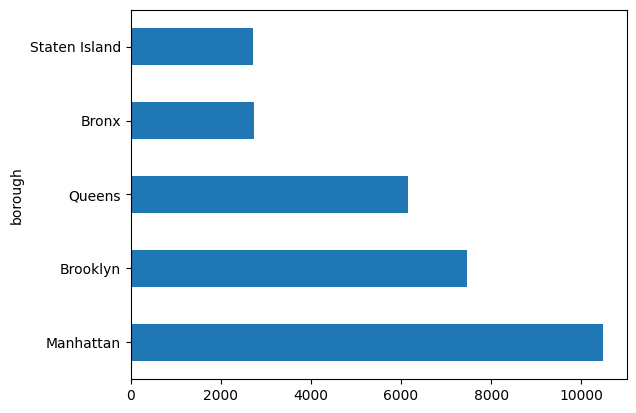

In [76]:
merged['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [78]:
df_pop = pd.read_csv('boro_population.csv')
df_pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [ ]:
merged = merged.merge(df_neigh, left_on='Owner Zip Code', right_on='zip', how='left')
merged.head()

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.